In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=3ed0a6d708e5381436ae543830a5a81aeac7840292edb8addf92612ca7bb3c38
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
df['BILL_TOTAL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [ ]:
df['BILL_TOTAL'].mean()

269861.6712

In [ ]:
df['LIMIT_BAL'].mean()

167484.32266666667

In [ ]:
X = df.iloc[:,[1,25]].values
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.01010101, 0.06142041],
       [0.11111111, 0.06309411],
       [0.08080808, 0.07819659],
       ...,
       [0.02020202, 0.07263298],
       [0.07070707, 0.10765263],
       [0.04040404, 0.10127118]])

In [ ]:
import skfuzzy
clustering = skfuzzy.cmeans(data=X_scaled.T, c=5, m=2, error=0.005, maxiter=1000, init=None)
clustering

(array([[0.40458166, 0.08857597],
        [0.21552448, 0.07584647],
        [0.12511312, 0.13303684],
        [0.29420656, 0.27866053],
        [0.03730889, 0.08275153]]),
 array([[0.00688542, 0.02389047, 0.01190849, ..., 0.00255822, 0.00971181,
         0.00250321],
        [0.02538624, 0.18735836, 0.06883548, ..., 0.00992164, 0.04940618,
         0.01061496],
        [0.05864629, 0.40744133, 0.25141723, ..., 0.02583571, 0.30133682,
         0.04061153],
        [0.00841653, 0.0259158 , 0.01457738, ..., 0.0032216 , 0.01371452,
         0.00346666],
        [0.90066551, 0.35539404, 0.65326142, ..., 0.95846283, 0.62583068,
         0.94280364]]),
 array([[1.45084552e-01, 3.04846100e-01, 1.12408824e-01, ...,
         1.72760992e-01, 3.09642516e-01, 2.56233374e-01],
        [2.56381727e-01, 1.77468104e-01, 3.36139353e-01, ...,
         4.74356963e-02, 2.01054604e-01, 2.77841706e-01],
        [2.32895062e-01, 6.81203965e-02, 3.00396161e-01, ...,
         3.99079693e-01, 8.16250577e-03, 1.3

In [ ]:
predictions = clustering[1]
predictions

array([[0.00688542, 0.02389047, 0.01190849, ..., 0.00255822, 0.00971181,
        0.00250321],
       [0.02538624, 0.18735836, 0.06883548, ..., 0.00992164, 0.04940618,
        0.01061496],
       [0.05864629, 0.40744133, 0.25141723, ..., 0.02583571, 0.30133682,
        0.04061153],
       [0.00841653, 0.0259158 , 0.01457738, ..., 0.0032216 , 0.01371452,
        0.00346666],
       [0.90066551, 0.35539404, 0.65326142, ..., 0.95846283, 0.62583068,
        0.94280364]])

In [ ]:
predictions = predictions.argmax(axis=0)
predictions

array([4, 2, 4, ..., 4, 4, 4])

In [ ]:
np.unique(predictions, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 3445,  6553,  6425,  2230, 11347]))

In [ ]:
X_scaled

array([[0.01010101, 0.06142041],
       [0.11111111, 0.06309411],
       [0.08080808, 0.07819659],
       ...,
       [0.02020202, 0.07263298],
       [0.07070707, 0.10765263],
       [0.04040404, 0.10127118]])

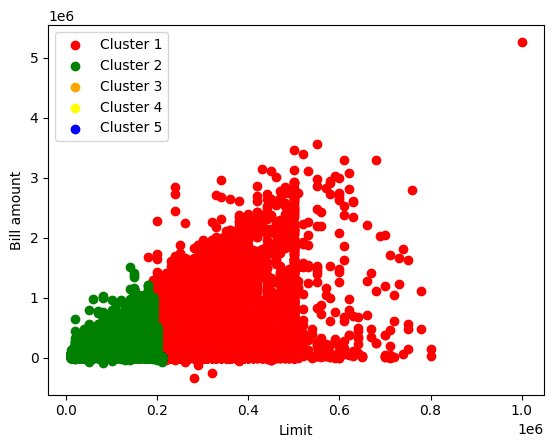

In [ ]:
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], c='red', label='Cluster 1')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], c='green', label="Cluster 2")
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], c='orange', label="Cluster 3")
plt.scatter(X[predictions == 3, 0], X[predictions == 3, 1], c='yellow', label="Cluster 4")
plt.scatter(X[predictions == 4, 0], X[predictions == 4, 1], c='blue', label="Cluster 5")
plt.xlabel('Limit')
plt.ylabel('Bill amount')
plt.legend()
plt.show()

In [ ]:
fpcs = {}

for n_clusters in range(2,10):
  center, prediction, _, _, _, _, fpc = skfuzzy.cmeans(data=X_scaled.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)
  fpcs.update({n_clusters:fpc})
fpcs

{2: 0.8057748810257414,
 3: 0.7255219875874902,
 4: 0.7051326461259521,
 5: 0.6465247277719006,
 6: 0.6425844939109813,
 7: 0.6186400864351649,
 8: 0.6025675183504139,
 9: 0.576015705755453}

Text(0, 0.5, 'fpcs')

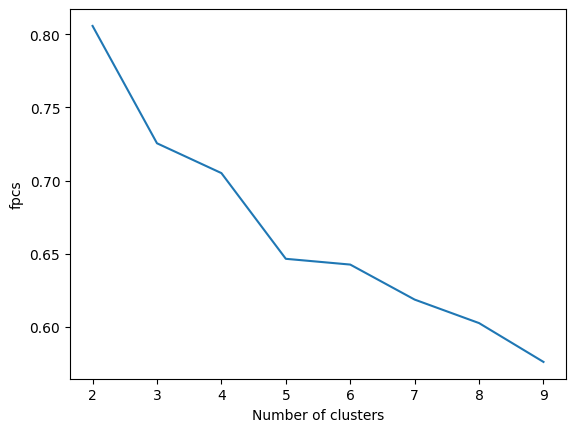

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(2,10), list(fpcs.values()))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('fpcs')

2
Axes(0.125,0.653529;0.227941x0.226471)
3
Axes(0.398529,0.653529;0.227941x0.226471)
4
Axes(0.672059,0.653529;0.227941x0.226471)
5
Axes(0.125,0.381765;0.227941x0.226471)
6
Axes(0.398529,0.381765;0.227941x0.226471)
7
Axes(0.672059,0.381765;0.227941x0.226471)
8
Axes(0.125,0.11;0.227941x0.226471)
9
Axes(0.398529,0.11;0.227941x0.226471)
10
Axes(0.672059,0.11;0.227941x0.226471)


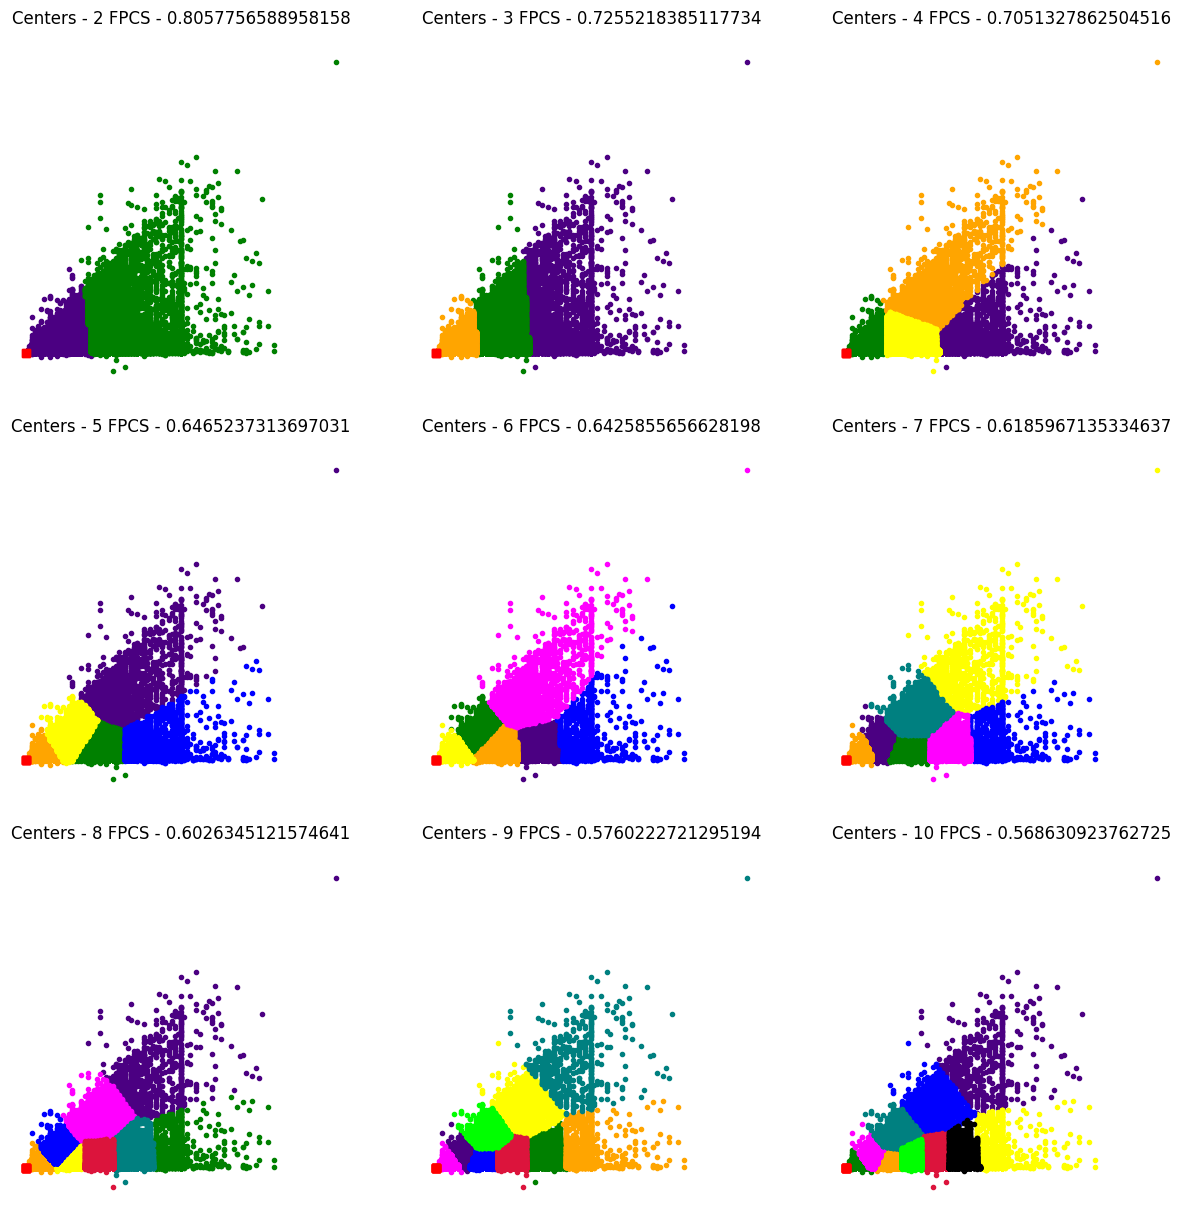

In [ ]:
colors = ['indigo', 'green', 'orange', 'yellow', 'blue', 'fuchsia', 'teal', 'crimson', 'lime', 'black']
fig, axes = plt.subplots(3, 3, figsize=(15,15))
fpcs = []
for n_clusters, ax in enumerate(axes.reshape(-1), 2):
  print(n_clusters)
  print(ax)
  center, prediction, _, _, _, _, fpc = skfuzzy.cmeans(data=X_scaled.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)
  fpcs.append(fpc)

  prediction = np.argmax(prediction, axis=0)

  for i in range(n_clusters):
    ax.plot(X[prediction == i,0], X[prediction == i,1], '.', color=colors[i])

  for c in center:
    ax.plot(c[0], c[1], 'rs')

  ax.set_title('Centers - {} FPCS - {}'.format(n_clusters, fpc))
  ax.axis('off')

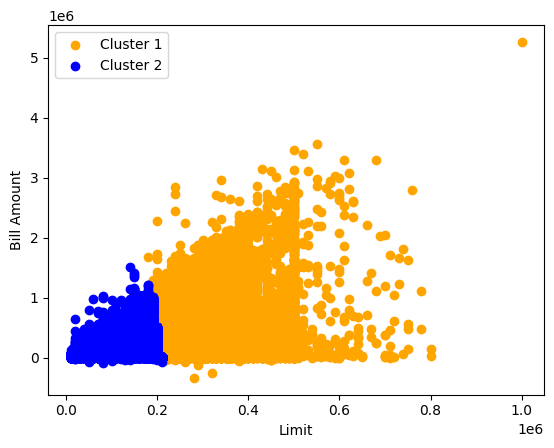

In [ ]:
plt.scatter(X[predictions == 0,0], X[predictions == 0,1], c='orange', label="Cluster 1")
plt.scatter(X[predictions == 1,0], X[predictions == 1,1], c='blue', label="Cluster 2")
plt.xlabel('Limit')
plt.ylabel('Bill Amount')
plt.legend()
plt.show()

In [ ]:
centers = clustering[0]
centers = scaler.inverse_transform(centers)
centers = pd.DataFrame(data = centers, columns = ['Limit', 'Bill Amount'])
centers

,Limit,Bill Amount
0,322872.706361,347906.914919
1,86983.358439,197615.067334


In [ ]:
np.unique(predictions, return_counts=True)

(array([0, 1]), array([ 9752, 20248]))

In [ ]:
new_df = pd.concat([df, pd.DataFrame({'cluster':predictions})], axis=1)
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL,cluster
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,1
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,1
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,725349.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,21182.0,1
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,70496.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,266611.0,1


In [ ]:
len(predictions)

30000